In [2]:
from bs4 import BeautifulSoup
import requests

In [7]:
url="https://www.imdb.com/chart/top/?ref_=nv_mv_250"

In [8]:
response= requests.get(url)

print(response)

<Response [200]>


In [9]:
imdb = BeautifulSoup(response.content,'lxml')
print (imdb)

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Top 250 Movies - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/chart/top/" rel="canonical"/>
<meta content="http://www.imdb.com/chart/top/" property="og:url"/>
<script>
    if (typeof uet == 'function') {
      uet("bb", "Loa

In [10]:
r1 = imdb.find('td',attrs={'class':'titleColumn'})
print(r1)

<td class="titleColumn">
      1.
      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
<span class="secondaryInfo">(1994)</span>
</td>


In [11]:
print(r1.a)
print(r1.a.text)
print(r1.a.get('title'))
print(r1.a.get('href'))
print(r1.span.text[1:-1])

<a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>
The Shawshank Redemption
Frank Darabont (dir.), Tim Robbins, Morgan Freeman
/title/tt0111161/
1994


In [12]:
print(r1.text)


      1.
      The Shawshank Redemption
(1994)



In [13]:
r2= imdb.find('td', attrs={'ratingColumn imdbRating'})
print(r2)

<td class="ratingColumn imdbRating">
<strong title="9.2 based on 2,717,937 user ratings">9.2</strong>
</td>


In [14]:
print(r2.strong.get('title'))

9.2 based on 2,717,937 user ratings


In [15]:
print(r2.text.strip())

9.2


In [16]:
print(r2.strong.get('title')[13:22])

2,717,937


In [17]:
movie_names=[]
crew=[]
year=[]
rank=[]
for i in imdb.findAll('td',attrs={'class':'titleColumn'}):
    movie_names.append(i.a.text)
    crew.append(i.a.get('title'))
    year.append(i.span.text[1:-1])
    rank.append(i.text.strip()[:3])

In [18]:
print(len(movie_names))
print(len(crew))
print(len(year))
print(len(rank))

250
250
250
250


In [19]:
print(movie_names,rank)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'Il buono, il brutto, il cattivo', 'Forrest Gump', 'Fight Club', 'The Lord of the Rings: The Two Towers', 'Inception', 'The Empire Strikes Back', 'The Matrix', 'GoodFellas', "One Flew Over the Cuckoo's Nest", 'Se7en', 'Shichinin no samurai', "It's a Wonderful Life", 'The Silence of the Lambs', 'Saving Private Ryan', 'Cidade de Deus', 'Interstellar', 'La vita è bella', 'The Green Mile', 'Star Wars', 'Terminator 2: Judgment Day', 'Back to the Future', 'Sen to Chihiro no kamikakushi', 'The Pianist', 'Psycho', 'Gisaengchung', 'Léon', 'The Lion King', 'Gladiator', 'American History X', 'The Departed', 'The Prestige', 'Whiplash', 'The Usual Suspects', 'Casablanca', 'Hotaru no haka', 'Seppuku', 'The Intouchables', 'Modern Times', 'Once Upon a Time in th

In [20]:
rank1 = [i.replace('.\n','') for i in rank]
rank2 = [i.replace('.','') for i in rank1]
print(rank2)
   
    

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

In [21]:
ratings =[]
user_reviews= []
for i in imdb.findAll('td',attrs={'class':'ratingColumn imdbRating'}):
    ratings.append(i.text.strip())
    user_reviews.append(i.strong.get('title')[13:22])

In [22]:
print(len(ratings))
print(len(user_reviews))

250
250


In [23]:
urev= [i.replace('us','')for i in user_reviews]
urev1= [i.replace(' u','')for i in urev]
urev2= [i.replace(',','')for i in urev1]
print(urev2)

['2717937', '1888505', '2690643', '1288674', '803203', '1372892', '1870162', '2087110', '1899487', '770900', '2112817', '2161425', '1688414', '2387865', '1308665', '1938385', '1178987', '1019762', '1678597', '350129', '468566', '1453084', '1410472', '765131', '1878158', '705029', '1321150', '1381041', '1113284', '1224603', '778737', '845944', '680819', '834298', '1177738', '1073939', '1520773', '1134977', '1343297', '1351421', '887987', '1096884', '579014', '283384', '59651 ', '872618', '246177', '334405', '265656', '498044', '894918', '187185', '676682', '1253424', '1581192', '978370', '1131687', '394000', '225085', '200581', '1038124', '226985', '1105435', '128021', '726747', '548627', '1166193', '496729', '1726361', '589593', '1474775', '406673', '523867', '1007964', '1327418', '1048708', '253920', '1160142', '402003', '357170', '990778', '278480', '246804', '406977', '854325', '46924 ', '847417', '93253 ', '1067289', '1022394', '678836', '83659 ', '1033382', '337196', '447314', '16

In [27]:
import pandas as pd

In [28]:
top250= pd.DataFrame({'Rank':rank2,'Movie':movie_names,
                     'Year':year,'Crew':crew,'IMDB_Ratings':ratings,
                     'User_Review':urev2})
top250.head()

,Rank,Movie,Year,Crew,IMDB_Ratings,User_Review
0,1,The Shawshank Redemption,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.2,2717937
1,2,The Godfather,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.2,1888505
2,3,The Dark Knight,2008,"Christopher Nolan (dir.), Christian Bale, Heat...",9.0,2690643
3,4,The Godfather Part II,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert...",9.0,1288674
4,5,12 Angry Men,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",9.0,803203


In [30]:
top250.to_csv('IMDB_top250_movies.csv')


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
top250.dtypes

Rank            object
Movie           object
Year            object
Crew            object
IMDB_Ratings    object
User_Review     object
dtype: object

In [33]:
top250['IMDB_Ratings']= top250['IMDB_Ratings'].astype('float')
top250['User_Review']= top250['User_Review'].astype('int')
top250['Rank']= top250['Rank'].astype('int')
top250['Year']= top250['Year'].astype('int')
top250.dtypes

Rank              int32
Movie            object
Year              int32
Crew             object
IMDB_Ratings    float64
User_Review       int32
dtype: object

In [34]:
print (top250.columns
    )

Index(['Rank', 'Movie', 'Year', 'Crew', 'IMDB_Ratings', 'User_Review'], dtype='object')


In [36]:
r1 = top250.sort_values(by='User_Review',ascending=False).reset_index(drop=True).head(7)
r1 [['Movie','User_Review']]

,Movie,User_Review
0,The Shawshank Redemption,2717937
1,The Dark Knight,2690643
2,Inception,2387865
3,Fight Club,2161425
4,Forrest Gump,2112817
5,Pulp Fiction,2087110
6,The Matrix,1938385


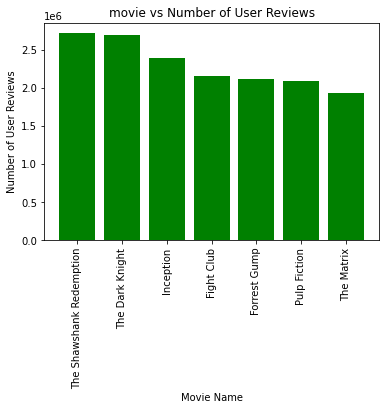

In [42]:
plt.bar(r1['Movie'],r1['User_Review'],color='green')
plt.title('movie vs Number of User Reviews')
plt.xlabel('Movie Name')
plt.ylabel('Number of User Reviews')
plt.xticks(rotation=90)
plt.show()

In [44]:
print(top250['Year'].min())
print(top250['Year'].max())


1921
2022


In [51]:
top250['Year_bin']=pd.cut(top250['Year'],bins=list(range(1920,2025,10)))
top250.head()

,Rank,Movie,Year,Crew,IMDB_Ratings,User_Review,Year_bin
0,1,The Shawshank Redemption,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.2,2717937,"(1990, 2000]"
1,2,The Godfather,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.2,1888505,"(1970, 1980]"
2,3,The Dark Knight,2008,"Christopher Nolan (dir.), Christian Bale, Heat...",9.0,2690643,"(2000, 2010]"
3,4,The Godfather Part II,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert...",9.0,1288674,"(1970, 1980]"
4,5,12 Angry Men,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",9.0,803203,"(1950, 1960]"


In [54]:
top250['Year_bin'].value_counts()

(2000, 2010]    48
(1990, 2000]    45
(2010, 2020]    40
(1980, 1990]    25
(1970, 1980]    23
(1950, 1960]    22
(1960, 1970]    16
(1940, 1950]    12
(1930, 1940]    10
(1920, 1930]     6
Name: Year_bin, dtype: int64

In [57]:
bef_2000=top250[top250['Year']<=2000]
aft_2000=top250[top250['Year']>=2000]
print(bef_2000.shape)
print(aft_2000.shape)

(159, 7)
(96, 7)


In [66]:
r2={'bef2000_avg_rating':bef_2000['IMDB_Ratings'].mean(),
    'aft2000_avg_rating':aft_2000['IMDB_Ratings'].mean()}
r2

{'bef2000_avg_rating': 8.264150943396233,
 'aft2000_avg_rating': 8.229166666666673}

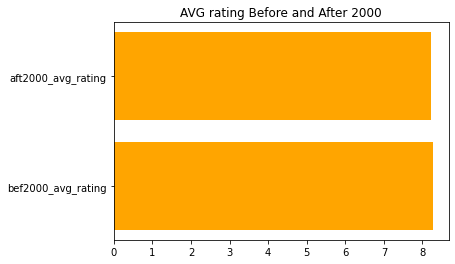

In [71]:
plt.barh(list(r2.keys()),list(r2.values()),color='orange')
plt.title('AVG rating Before and After 2000')
plt.show()

In [76]:
r3 = top250.groupby(['Year_bin'])['IMDB_Ratings'].mean()
r3

Year_bin
(1920, 1930]    8.133333
(1930, 1940]    8.160000
(1940, 1950]    8.216667
(1950, 1960]    8.245455
(1960, 1970]    8.225000
(1970, 1980]    8.282609
(1980, 1990]    8.228000
(1990, 2000]    8.351111
(2000, 2010]    8.256250
(2010, 2020]    8.200000
Name: IMDB_Ratings, dtype: float64

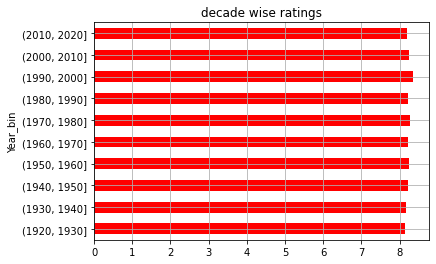

In [80]:
r3.plot(kind='barh',color='red')
plt.title('decade wise ratings')
plt.grid()
plt.show()